<a href="https://colab.research.google.com/github/isatny/projeto/blob/main/Trabalho_Computacional_ICP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

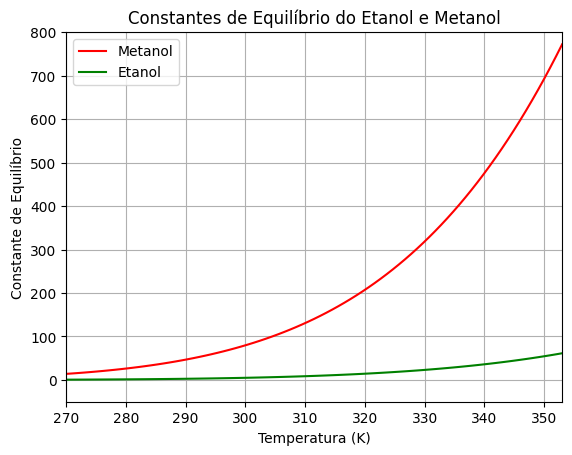

In [ ]:
#Importação dos Módulos
import numpy as np
import matplotlib.pyplot as plt

#Definição dos Parâmetros para o Metanol
Am = 18.5875
Bm = 3626.55
Cm = -34.29

#Definição dos Parâmetros para o Etanol
Ae = 16.8969
Be = 3803.98
Ce = -41.68

#Parâmetros compartilhados por ambas substâncias
P = 1.75

#Domínio: Temperatura °K(x); 270 ≥ x ≥ 35Z
#Neste grupo, Z = 3
Tx = np.linspace(270, 353, 83)

#Imagens: Constantes do Etanol e Metanol
yMet = (1/P)*np.exp(Am-(Bm/(Tx+Cm)))
yEt = (1/P)*np.exp(Ae-(Be/(Tx+Ce)))

#Gráfico
plt.plot(Tx, yMet, label = 'Metanol', color="red")
plt.plot(Tx, yEt, label = 'Etanol', color="green")
plt.xlabel("Temperatura (K)")
plt.ylabel("Constante de Equilíbrio")
plt.title("Constantes de Equilíbrio do Etanol e Metanol")
plt.legend()
plt.axis([270, 353, -50, 800])
plt.grid()
plt.show()

In [ ]:
import numpy as np
from tabulate import tabulate   # Função utilizada para gerar tabelas formatadas

# Legenda com informações importantes
# 612 – 3 últimos dígitos do DRE do 1º integrante do grupo (XXX)
# 807 – 3 últimos dígitos do DRE do 2º integrante do grupo (YYY)

# ==============================================================================
# 1. INFORMAÇÕES E ESPECIFICAÇÕES DO PROBLEMA
# ==============================================================================
print("Carregando dados do problema...")

# 1.1 Correntes de Entrada --

F1 = float(input("Digite a vazão (kmol/s) da Corrente 1: "))
x1_et, x1_ag, x1_me = 0.60, 0.39, 0.01    # Composições da Corrente 1 informadas no estudo de caso

F2 = float(input("Digite a vazão (kmol/s) da Corrente 2: "))
x2_et, x2_ag, x2_me = 0.75, 0.22, 0.03    # Composições da Corrente 2 informadas no estudo de caso

# 1.2 Especificações do Processo --

razao_flash = 4.0     # Razão de vazão entre as fases vapor e líquido de 4:1
recuperacao_etanol = 0.97   # Especificação para o equipamento de destilação
fracao_produto = 0.70   # Especificação para o restante que seguem como produto final

x6_et, x6_ag, x6_me = 0.985, 0.012, 0.003   # Composições da Corrente 6 informadas no estudo de caso

# 1.3 Parâmetros Físicos para o Flash --

T_K = 25.0 + 273.15   # Temperatura do flash em Kelvin
P_kPa = 1.75    # Pressão do flash em Kilopascal

# Parâmetros informados no estudo de caso
PARAMS_ETANOL = {'A': 16.8969, 'B': 3803.98, 'C': -41.68}
PARAMS_METANOL = {'A': 18.5875, 'B': 3626.55, 'C': -34.29}

# ==============================================================================
# 2. CÁLCULO DO BALANÇO DE MASSA
# ==============================================================================
print("Iniciando cálculos do balanço de massa...")

# 2.1 Misturador (Criação da Corrente 3) ---

# Vazões molares na Corrente 3 (Total, Etanol, Água e Metanol)
F3 = F1 + F2
F3_et = F1 * x1_et + F2 * x2_et
F3_ag = F1 * x1_ag + F2 * x2_ag
F3_me = F1 * x1_me + F2 * x2_me

# 2.2 Separador Flash (Criação das Correntes 4 e 5) ---

# K: Constantes de equilíbrio
K_etanol = (1/P_kPa) * np.exp(PARAMS_ETANOL['A'] - PARAMS_ETANOL['B'] / (T_K + PARAMS_ETANOL['C']))
K_metanol = (1/P_kPa) * np.exp(PARAMS_METANOL['A'] - PARAMS_METANOL['B'] / (T_K + PARAMS_METANOL['C']))


F5 = F3 / (razao_flash + 1)   # F5: Vazão molar total da Corrente 5 (Líquido)
F4 = F3 - F5    # F4: Vazão molar total da Corrente 4 (Vapor)

# Theta: Fração da alimentação que vaporiza
theta_etanol = (razao_flash * K_etanol) / (1 + razao_flash * K_etanol)
theta_metanol = (razao_flash * K_metanol) / (1 + razao_flash * K_metanol)

# Vazões molares nas Correntes 4 e 5 (Etanol, Água e Metanol)
F4_et = theta_etanol * F3_et
F5_et = F3_et - F4_et
F4_me = theta_metanol * F3_me
F5_me = F3_me - F4_me
F4_ag = F4 - F4_et - F4_me    # F4_agua: Vazão molar (por diferença)
F5_ag = F3_ag - F4_ag

# 2.3 Destilação e Divisor (Criação das Correntes 6, 7, 8, 9) ---

F6_et = recuperacao_etanol * F4_et    # F6_etanol: Vazão molar de etanol recuperado na Corrente 6
F6 = F6_et / x6_et    # F6: Vazão molar total da Corrente 6 (Destilado)

F9 = fracao_produto * F6    # F9: Vazão molar total da Corrente 9 (Produto Final)
F8 = F6 - F9    # F8: Vazão molar total da Corrente 8 (Refluxo)
F7 = F4 - F9    # F7: Vazão molar total da Corrente 7 (Resíduo)

# Vazões molares na Corrente 9 (Etanol, Água e Metanol)
F9_et = F9 * x6_et
F9_ag = F9 * x6_ag
F9_me = F9 * x6_me

# Vazões molares na Corrente 7 (Etanol, Água e Metanol)
F7_et = F4_et - F9_et
F7_ag = F4_ag - F9_ag
F7_me = F4_me - F9_me

print("Cálculos finalizados.")

# ==============================================================================
# 3. APRESENTAÇÃO DOS RESULTADOS FINAIS
# ==============================================================================

# 3.1 Calculando as composições para depois realizar o print ---

x3_et, x3_ag, x3_me = F3_et/F3, F3_ag/F3, F3_me/F3
y4_et, y4_ag, y4_me = F4_et/F4, F4_ag/F4, F4_me/F4
x5_et, x5_ag, x5_me = F5_et/F5, F5_ag/F5, F5_me/F5
x7_et, x7_ag, x7_me = F7_et/F7, F7_ag/F7, F7_me/F7

# 3.2 Resultado completo com os valores originais em listas ---
tabela_de_dados = [
    ["Corrente 1", F1, x1_et, x1_ag, x1_me],
    ["Corrente 2", F2, x2_et, x2_ag, x2_me],
    ["Corrente 3", F3, x3_et, x3_ag, x3_me],
    ["Corrente 4", F4, y4_et, y4_ag, y4_me],
    ["Corrente 5", F5, x5_et, x5_ag, x5_me],
    ["Corrente 6", F6, x6_et, x6_ag, x6_me],
    ["Corrente 7", F7, x7_et, x7_ag, x7_me],
    ["Corrente 8", F8, x6_et, x6_ag, x6_me],
    ["Corrente 9", F9, x6_et, x6_ag, x6_me]
]

# 3.3: Desenolvimento das tabelas com os resultados ---
cabecalho = ["Corrente", "Vazão (kmol/s)", "Etanol", "Água", "Metanol"]

print("\n" + "="*70)
print("RELATÓRIO FINAL DE CORRENTES DA GREENCHEM".center(70))
print("="*70)

# O estilo 'fancy_grid' é uma das formatações de tabela na biblioteca
print(tabulate(tabela_de_dados, headers=cabecalho, tablefmt="fancy_grid", floatfmt=("", ".2f", ".2%", ".2%", ".2%")))   # O 'floatfmt' formata os números: '.2f' para vazão, '.2%' para porcentagens
print("\n" + "-"*70)
print("Parâmetros de Equilíbrio Calculados:".center(70))
print(f"K do Etanol = {K_etanol:.1f} | K do Metanol = {K_metanol:.1f}".center(70))    # Foi inserido os valores de K separadamente para maior clareza
print("-"*70)

print("\n" + "="*70)
print("RELATÓRIO FINAL COM OS VALORES ORIGINAIS".center(70))
print("="*70)

print(tabulate(tabela_de_dados, headers=cabecalho, tablefmt="fancy_grid", floatfmt=("")))
print("\n" + "-"*70)
print("Parâmetros de Equilíbrio Calculados:".center(70))
print(f"K do Etanol = {K_etanol} | K do Metanol = {K_metanol}".center(70))
print("-"*70)

Carregando dados do problema...
Digite a vazão (kmol/s) da Corrente 1: 612
Digite a vazão (kmol/s) da Corrente 2: 807
Iniciando cálculos do balanço de massa...
Cálculos finalizados.

              RELATÓRIO FINAL DE CORRENTES DA GREENCHEM               
╒════════════╤══════════════════╤══════════╤════════╤═══════════╕
│ Corrente   │   Vazão (kmol/s) │   Etanol │   Água │   Metanol │
╞════════════╪══════════════════╪══════════╪════════╪═══════════╡
│ Corrente 1 │           612.00 │   60.00% │ 39.00% │     1.00% │
├────────────┼──────────────────┼──────────┼────────┼───────────┤
│ Corrente 2 │           807.00 │   75.00% │ 22.00% │     3.00% │
├────────────┼──────────────────┼──────────┼────────┼───────────┤
│ Corrente 3 │          1419.00 │   68.53% │ 29.33% │     2.14% │
├────────────┼──────────────────┼──────────┼────────┼───────────┤
│ Corrente 4 │          1135.20 │   81.16% │ 16.18% │     2.66% │
├────────────┼──────────────────┼──────────┼────────┼───────────┤
│ Corrente 5 │      